Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Input
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.python.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic

plt.style.use('./deeplearning.mplstyle')
import logging 
logging.getLogger('tensorflow').setLevel(logging.ERROR) # suppress tensorflow warnings
tf.autograph.set_verbosity(0) 

Dataset

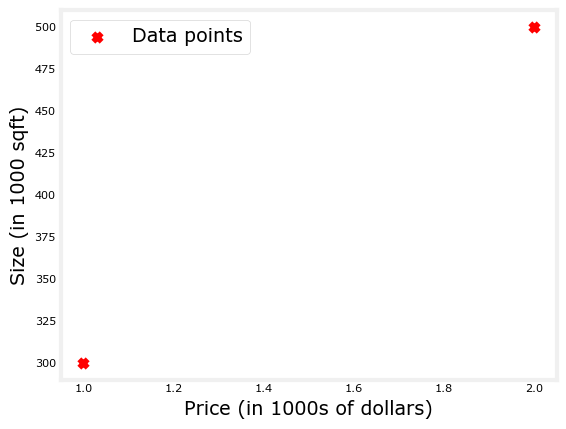

In [6]:
X_train = np.array([[1.0], [2.0]], dtype = np.float32) # 2 samples, 1 feature
Y_train = np.array([[300.0], [500.0]], dtype = np.float32)

fig, ax = plt.subplots(1,1) 
ax.scatter(X_train, Y_train, marker = 'x', c = 'r', label = 'Data points') # plot data points
ax.legend(fontsize = 'xx-large')
ax.set_xlabel('Price (in 1000s of dollars)', fontsize = 'xx-large')
ax.set_ylabel('Size (in 1000 sqft)', fontsize = 'xx-large')
plt.show()


Regression Model

In [7]:
linear_layer = Dense(units = 1, activation = 'linear') # create a linear layer, no activation, units = 1 means 1 output

linear_layer.get_weights() # get the weights of the layer

[]

    There are no weights as the weight are not yet instantiated.

In [8]:
a1 = linear_layer(X_train[0].reshape(1,1)) # apply the layer to the first sample
print(a1)

tf.Tensor([[-0.41]], shape=(1, 1), dtype=float32)


In [9]:
w, b = linear_layer.get_weights()
print(f" w = {w}, b = {b}")

 w = [[-0.41]], b = [0.]


In [11]:
set_w = np.array([[200]]) 
set_b = np.array([100]) 

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b]) 
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [12]:
a1 = linear_layer(X_train[0].reshape(1,1)) # apply the layer to the first sample
print(a1)

alin = np.dot(set_w, X_train[0]) + set_b # manually compute the output
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[300.]


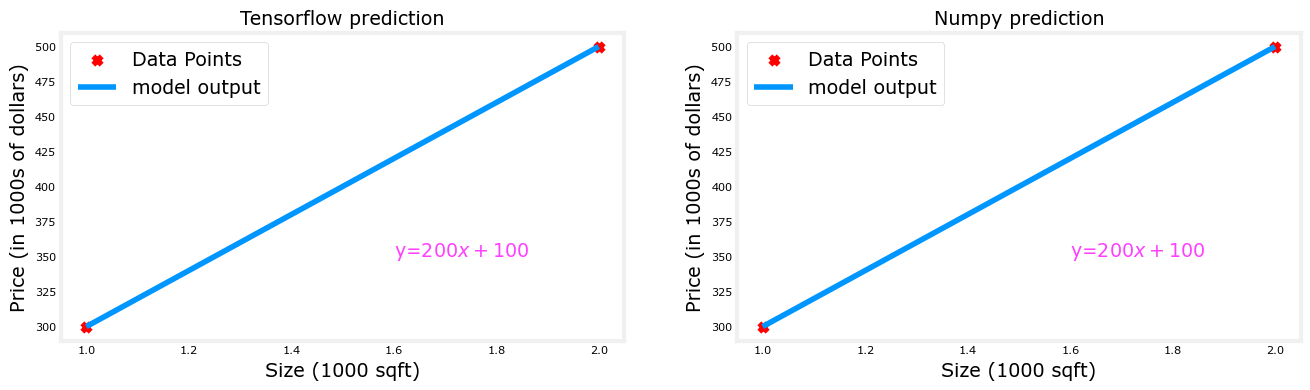

In [13]:
prediction_tf = linear_layer(X_train) # apply the layer to all samples
prediction_np = np.dot(X_train, set_w) + set_b

plt_linear(X_train, Y_train, prediction_tf, prediction_np) # plot the linear model